In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
cd /Users/fred/Umila/numila

/Users/fred/Umila/numila


In [3]:
from sklearn import metrics
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('whitegrid')
seaborn.set_palette('muted')

from main import *

In [4]:
langs = ['English', 'Farsi', 'German', 'Japanese', 'Spanish']
langs = [setup(lang, 8000) for lang in langs]

INFO:numila:parameters:

ADD_BOUNDARIES: false
BIND: false
BIND_OPERATION: addition
CHUNK_LEARNING: 0.0
CHUNK_THRESHOLD: null
DECAY: false
DEPTH: 0
DIM: 10000
EXEMPLAR_THRESHOLD: 0.2
FTP_PREFERENCE: 1
GENERALIZE: false
GRAPH: holograph
LEARNING_RATE: 0.1
LEARN_MODE: old
MEMORY_SIZE: 4
PERCENT_NON_ZERO: 0.005
SEMANTIC_TRANSFER: 0.0


INFO:numila:parameters:

ADD_BOUNDARIES: false
BIND: false
BIND_OPERATION: addition
CHUNK_LEARNING: 0.0
CHUNK_THRESHOLD: null
DECAY: false
DEPTH: 0
DIM: 10000
EXEMPLAR_THRESHOLD: 0.05
FTP_PREFERENCE: 1
GENERALIZE: false
GRAPH: probgraph
LEARNING_RATE: 0.1
LEARN_MODE: old
MEMORY_SIZE: 4
PERCENT_NON_ZERO: 0.005
SEMANTIC_TRANSFER: 0.0


[numila]	Trained on 8000 utterances in 4.844551086425781 seconds
[numila]	Timer (total): 4.846 seconds
[numila]	Trained on 8000 utterances in 28.112066984176636 seconds
[numila]	Timer (total): 28.113 seconds
INFO:numila:parameters:

ADD_BOUNDARIES: false
BIND: false
BIND_OPERATION: addition
CHUNK_LEARNING: 0.0
CHUNK_THRESHOLD: 

Ngram train time (total): 0.182 seconds
Ngram train time (total): 0.133 seconds

INFO:numila:parameters:

ADD_BOUNDARIES: false
BIND: false
BIND_OPERATION: addition
CHUNK_LEARNING: 0.0
CHUNK_THRESHOLD: null
DECAY: false
DEPTH: 0
DIM: 10000
EXEMPLAR_THRESHOLD: 0.2
FTP_PREFERENCE: 1
GENERALIZE: false
GRAPH: holograph
LEARNING_RATE: 0.1
LEARN_MODE: old
MEMORY_SIZE: 4
PERCENT_NON_ZERO: 0.005
SEMANTIC_TRANSFER: 0.0


INFO:numila:parameters:

ADD_BOUNDARIES: false
BIND: false
BIND_OPERATION: addition
CHUNK_LEARNING: 0.0
CHUNK_THRESHOLD: null
DECAY: false
DEPTH: 0
DIM: 10000
EXEMPLAR_THRESHOLD: 0.05
FTP_PREFERENCE: 1
GENERALIZE: false
GRAPH: probgraph
LEARNING_RATE: 0.1
LEARN_MODE: old
MEMORY_SIZE: 4
PERCENT_NON_ZERO: 0.005
SEMANTIC_TRANSFER: 0.0


[numila]	Trained on 8000 utterances in 5.634416103363037 seconds
[numila]	Timer (total): 5.636 seconds
[numila]	Trained on 8000 utterances in 34.23041009902954 seconds
[numila]	Timer (total): 34.233 seconds



Ngram train time (total): 0.213 seconds

INFO:numila:parameters:

ADD_BOUNDARIES: false
BIND: false
BIND_OPERATION: addition
CHUNK_LEARNING: 0.0
CHUNK_THRESHOLD: null
DECAY: false
DEPTH: 0
DIM: 10000
EXEMPLAR_THRESHOLD: 0.2
FTP_PREFERENCE: 1
GENERALIZE: false
GRAPH: holograph
LEARNING_RATE: 0.1
LEARN_MODE: old
MEMORY_SIZE: 4
PERCENT_NON_ZERO: 0.005
SEMANTIC_TRANSFER: 0.0


INFO:numila:parameters:

ADD_BOUNDARIES: false
BIND: false
BIND_OPERATION: addition
CHUNK_LEARNING: 0.0
CHUNK_THRESHOLD: null
DECAY: false
DEPTH: 0
DIM: 10000
EXEMPLAR_THRESHOLD: 0.05
FTP_PREFERENCE: 1
GENERALIZE: false
GRAPH: probgraph
LEARNING_RATE: 0.1
LEARN_MODE: old
MEMORY_SIZE: 4
PERCENT_NON_ZERO: 0.005
SEMANTIC_TRANSFER: 0.0


[numila]	Trained on 8000 utterances in 3.661931037902832 seconds
[numila]	Timer (total): 3.663 seconds
[numila]	Trained on 8000 utterances in 21.352200031280518 seconds
[numila]	Timer (total): 21.355 seconds



Ngram train time (total): 0.122 seconds

INFO:numila:parameters:

ADD_BOUNDARIES: false
BIND: false
BIND_OPERATION: addition
CHUNK_LEARNING: 0.0
CHUNK_THRESHOLD: null
DECAY: false
DEPTH: 0
DIM: 10000
EXEMPLAR_THRESHOLD: 0.2
FTP_PREFERENCE: 1
GENERALIZE: false
GRAPH: holograph
LEARNING_RATE: 0.1
LEARN_MODE: old
MEMORY_SIZE: 4
PERCENT_NON_ZERO: 0.005
SEMANTIC_TRANSFER: 0.0


INFO:numila:parameters:

ADD_BOUNDARIES: false
BIND: false
BIND_OPERATION: addition
CHUNK_LEARNING: 0.0
CHUNK_THRESHOLD: null
DECAY: false
DEPTH: 0
DIM: 10000
EXEMPLAR_THRESHOLD: 0.05
FTP_PREFERENCE: 1
GENERALIZE: false
GRAPH: probgraph
LEARNING_RATE: 0.1
LEARN_MODE: old
MEMORY_SIZE: 4
PERCENT_NON_ZERO: 0.005
SEMANTIC_TRANSFER: 0.0


[numila]	Trained on 8000 utterances in 5.463415145874023 seconds
[numila]	Timer (total): 5.464 seconds
[numila]	Trained on 8000 utterances in 42.997530937194824 seconds
[numila]	Timer (total): 43.001 seconds



Ngram train time (total): 0.156 seconds


# ROC

In [5]:
rocs = itertools.chain.from_iterable(roc_lang(lang) for lang in langs)
roc_df = pd.DataFrame(list(rocs))

In [6]:
def roc_plot(df):
    ax = plt.subplot(1,1,1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    for i, row in df.iterrows():
        plt.plot(row.fpr, row.tpr, label='{0} (area = {1:0.2f})'
                 .format(row.model, row['ROC area under curve']))

    # Sort labels in legend.
    handles, labels = ax.get_legend_handles_labels()
    def get_aoc(handle_label):
        label = handle_label[1]
        return float(label[-5:-1])
    hl = sorted(zip(handles, labels), key=get_aoc, reverse=True)
    handles2, labels2 = zip(*hl)
    ax.legend(handles2, labels2, loc=4, frameon=True)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.gcf().set_size_inches(4, 4)

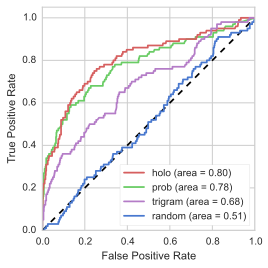

In [7]:
# Plot roc curve for German.
roc_plot(roc_df.query("language == 'German'"))
plt.savefig('figs/roc.pdf')

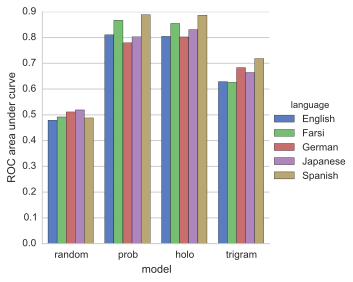

In [8]:
# Plot area under curve for all languages.
seaborn.factorplot('model', 'ROC area under curve', hue='language', data=roc_df, kind='bar')
plt.savefig('all_roc.pdf')

# BLEU

In [9]:
bleu_df = pd.concat(production.bleu_sim(lang) for lang in langs)

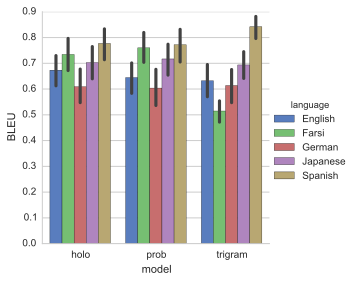

In [10]:
seaborn.factorplot(x='model', hue='language', y='BLEU', data=bleu_df, kind='bar',
            order=['holo', 'prob', 'trigram']
               )
# plt.legend().draw_frame(True)
plt.savefig('figs/bleu.pdf')

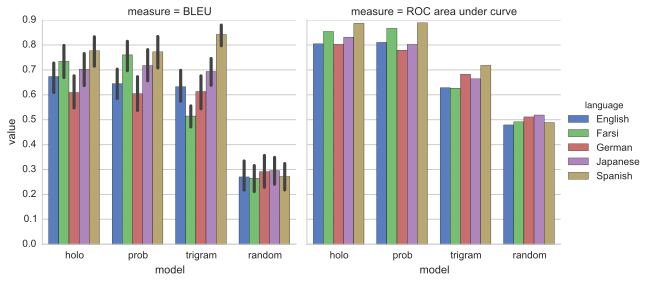

In [12]:
# full_df = roc_df[['ROC area under curve', 'model', 'language']].rename(columns={'ROC area under curve': 'measure'}).head()

full_df = pd.concat([pd.melt(roc_df, id_vars=['model', 'language'],
                   value_vars=['ROC area under curve'], var_name='measure'), 
           pd.melt(bleu_df, id_vars=['model', 'language'],
                   value_vars=['BLEU'], var_name='measure')])
    
seaborn.factorplot('model', 'value', hue='language', col='measure', data=full_df,
                   kind='bar', col_order=['BLEU', 'ROC area under curve'],
                   order=['holo', 'prob', 'trigram', 'random'])
plt.savefig('figs/combined.pdf')